### Emma Klemets, 260775167   
All my work, code, output and written answers for #2 are in this notebook.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 2: 
Let’s use conjugate gradient to solve Laplace’s equation with boundary conditions using Green’s functions. With a little cleverness, we can actually do this without needing to set an exterior boundary. For
speed, let’s do this in two dimensions.

#### part a: 
First, we’ll figure out what V (r) (scalar potential) looks like from a point charge. Remember that a 2D point charge looks like a 3D line charge and so will have a log behavior rather than 1/r. We also need to be careful about the singularity at 0. While this can actually be written down properly with some effort, a much easier trick is to note that away from the origin, each point is the average of its neighbors. By knowing the potential at (1,0) has to be the average of its neighbors, we can work out the potential at the origin. We’ll ignore eps_0 and set ρ (charge density) to be the potential minus the average of neighbors. 

If you rescale your potential so that ρ[0, 0] = 1 and V [0, 0] = 1
(recall that we can add an arbitrary offset to a potential without affecting the physics of the situation), what is the potential V [1, 0] and V [2, 0]? 

To sanity check your answer, the potential V [5, 0] should be around -1.05.

$\nabla^2 V = -\rho$

$V(r) = -\frac{\lambda}{2\pi\epsilon_0}ln(r)$

In [344]:
#little radius function
rad = lambda x, y: np.sqrt(x**2 + y**2)

#our 2D potential from a point charge
twoD_po = lambda r: -1/(2*np.pi) * np.log(r)

C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


inf
0.2206356001526516


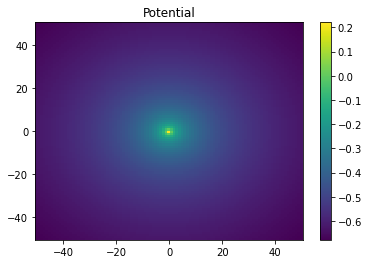

In [345]:
# V (r) looks like from a point charge will have a log behavior rather than 1/r. 

n = 101 #9
# ep_0 = 1 #should I not being using this?

V = np.zeros([n,n])

#get indice of [0, 0] since it's in the center of my array
centI = int(n/2)

x=np.linspace(-centI,centI,n)
xx,yy=np.meshgrid(x,x)

#get the potential everywhere
V_r = twoD_po(rad(xx,yy))

#but origin give inf as expected, so deal gotta with that
print(V_r[centI, centI])

# for origin
# singularity at 0, trick is to note that away from the origin, each point is the average of its neighbors. 
# By knowing the potential at (1,0) has to be the average of its neighbors, we can work out the potential at the origin. 
V_r[centI, centI] = 4*V_r[centI+1, centI] - (V_r[centI+2, centI] + V_r[centI+1, centI+1] + V_r[centI+1, centI-1])

print(V_r[centI, centI])

#it's easy to pass the right x and y indices with this
plt.pcolor(xx, yy, V_r,  shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

In [92]:
# set ρ to be the potential minus the average of neighbors. 
# rho = V - 0.25*(V_r[centI+1, centI] + V_r[i, i+1] + V_r[i-1, i] + V_r[i, i-1])

ave=(np.roll(V_r,1,axis=0)+np.roll(V_r,-1,axis=0)+np.roll(V_r,1,axis=1)+np.roll(V_r,-1,axis=1))/4
# print(ave[centI, centI])
rho = V_r - ave

print(rho[centI, centI])

rescale_rho = rho[centI, centI]


0.2206356001526516


In [93]:
#rescale by a multiple so rho[0,0] = 1
V_r = V_r/rescale_rho

# print("Needed offset for V: {} to get V[0,0] = {}".format(offset, V_r[centI, centI]))
# print("V[5, 0] = {}".format(V_r[centI+5, centI])) #should be around -1.05

ave=(np.roll(V_r,1,axis=0)+np.roll(V_r,-1,axis=0)+np.roll(V_r,1,axis=1)+np.roll(V_r,-1,axis=1))/4
# print(ave[centI, centI])
rho = V_r - ave

print("Needed to multiply by {} to get density rho[0, 0] = {}".format(rescale_rho, rho[centI, centI]))


Needed to multiply by 0.2206356001526516 to get density rho[0, 0] = 1.0


In [94]:
print(V_r[centI, centI])#, (V_r[centI+5, centI]))#
offset = 1 - V_r[centI, centI] 
V_r = V_r + offset #do I just add it?
#can multiply

print("Needed offset for V: {} to get V[0,0] = {}".format(offset, V_r[centI, centI]))
print("V[5, 0] = {}".format(V_r[centI+5, centI])) #should be around -1.05 hmm closer but still not quite?

1.0
Needed offset for V: 0.0 to get V[0,0] = 1.0
V[5, 0] = -1.160964047443681


Density rho[0, 0] = 1.0
potential V[1, 0] = 0.0 and V[2, 0] = -0.5


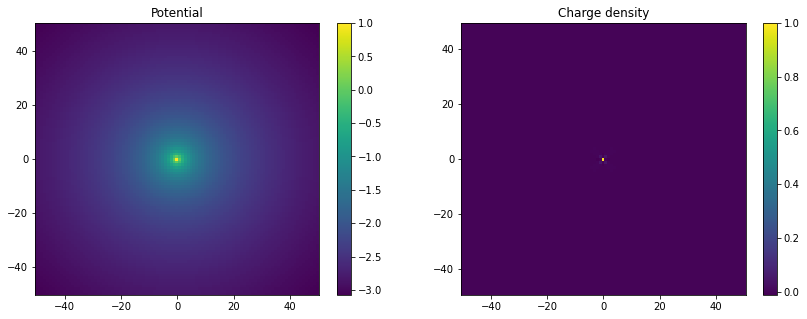

In [95]:
#checking the resulting values

print("Density rho[0, 0] = {}".format(rho[centI, centI]))

print("potential V[1, 0] = {} and V[2, 0] = {}".format(V_r[centI+1, centI], V_r[centI+2, centI]))
# how do I scale rho? won't this change V again?

fig, ax = plt.subplots(1, 2, figsize=(14,5))
im1 = ax[0].pcolor(xx, yy, V_r,  shading='auto')
ax[0].set_title("Potential")
fig.colorbar(im1, ax=ax[0])

b = 1
im2 = ax[1].pcolor(xx[b:-b], yy[b:-b], rho[b:-b],  shading='auto')
ax[1].set_title("Charge density")
fig.colorbar(im2, ax=ax[1])

plt.show()

# print(V_r[1,0], V_r[2,0], V_r[5,0])

V[1, 0] = offset, as $V(1 = -\frac{\lambda}{2\pi\epsilon_0}ln(1)) = 0$ and then it's rescaled.

## part b: 
Now that we know what the potential from a point charge is, we can calculate the potential everywhere in space from an arbitrary charge distribution by convolving the charge by our hard-won but eternal Green’s
function. We can write this as V = G x ρ. where G is the Green’s function. Even though we don’t usually think of it that way, this is indeed a matrix equation and so can be solved using conjugate-gradient (or any other tool
you care to use). In this case, though, we start with the potential on some surfaces, and want to find the charge distribution on those same surfaces. Write a conjugate-gradient solver that solves for ρ on a mask given V on
that mask. Use your solver to find the charge on a square box held at a potential of 1. Plot the charge density along one side of the box.

for 2D Laplace: Green's $= \frac{1}{2\pi}ln(r)$ I think

But what happens for r = 0 when this is undefined? -> use some softening
 

In [354]:
# V = G x ρ (convolution)

#convolve two arrays and add a variable amount of padding (p) before doing so
def convFunction(arr1, arr2, p=5):

    arrFT1 = np.fft.fft(np.pad(arr1, [0, p]))
    arrFT2 = np.fft.fft(np.pad(arr2, [0, p]))
        
    convolved = np.fft.ifft(arrFT1 * arrFT2)/len(arr1)
    
    if p > 0:
        convolved = convolved[:-p,:-p]

    return convolved.real

def green(x, y, soften = 0.01):
    r = rad(x,y)
    r[r<soften] = soften

    g = 1/(2*np.pi) * np.log(r)
    
    return g

def Ax(g, rho, mask): 
    Gp = convFunction(g, rho, p=120)
    
    return Gp*mask

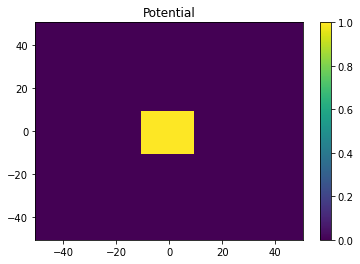

In [355]:
#set up for CG
m=101

cM = int(m/2) #will be the center of our box
s = 10

#setting up the BC of the potential I want
V_bc=np.zeros([m,m])

x=np.linspace(-cM,cM,m)
xx,yy=np.meshgrid(x,x)

#set up solid box
V_bc[cM-s:cM+s,cM-s:cM+s] = 1.0
    
plt.pcolor(xx, yy, V_bc,  shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

In [359]:
bc=np.zeros([m,m])
mask=np.zeros([m,m],dtype='bool')

#mask our box
mask[cM-s:cM+s,cM-s:cM+s]=True

b=V_bc.copy() #really just for fun

#our grid for (x, y) values
x=np.linspace(-cM,cM,m)
xx,yy=np.meshgrid(x,x)

#get greens function
G = green(xx,yy)

#plotting green's function to see what it looks like
# plt.pcolor(xx, yy, G, shading='auto')
# plt.colorbar()
# plt.show()

#start with intial guess of 0 for rho
rho = np.zeros([m,m])

#### our CG method #####

r=b-Ax(G, rho, mask)
p=r.copy()

for k in range(2000):

    Ap=Ax(G, p, mask)

    rtr=np.sum(r*r)
    if k%100==0:
        print('on iteration ' + repr(k) + ' residual is ' + repr(rtr))
        #are really not getting smaller
    alpha=rtr/np.sum(Ap*p)

    rho=rho+alpha*p #pad(alpha*p)

    rnew=r-alpha*Ap
    beta=np.sum(rnew*rnew)/rtr
    p=rnew+beta*p
    r=rnew
    
#residuals are actually getting bigger so something is really wrong here

on iteration 0 residual is 400.0
on iteration 100 residual is 10683280.239777967
on iteration 200 residual is 19168784.791281465
on iteration 300 residual is 27412831.934478007
on iteration 400 residual is 37291212.82631912
on iteration 500 residual is 50061124.69649552
on iteration 600 residual is 66905918.559501015
on iteration 700 residual is 89117904.74553466
on iteration 800 residual is 118173435.90942463
on iteration 900 residual is 155767985.05895022
on iteration 1000 residual is 203831844.5895581
on iteration 1100 residual is 264533645.33924568
on iteration 1200 residual is 340274714.9169515
on iteration 1300 residual is 433676003.0895363
on iteration 1400 residual is 547558964.3125254
on iteration 1500 residual is 684921738.538302
on iteration 1600 residual is 848911967.530492
on iteration 1700 residual is 1042797540.540078
on iteration 1800 residual is 1269936461.7905517
on iteration 1900 residual is 1533746881.7600713


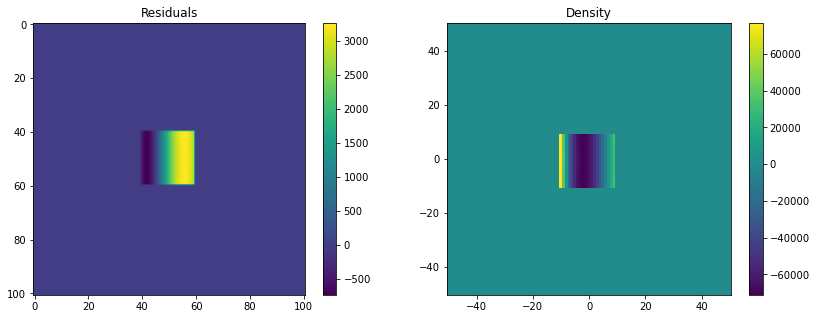

In [361]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

im1 = ax[0].imshow(r)
ax[0].set_title("Residuals")
fig.colorbar(im1, ax=ax[0])

im2 = ax[1].pcolor(xx, yy, rho, shading='auto')
ax[1].set_title("Density")
fig.colorbar(im2, ax=ax[1])
plt.show()

In [362]:
#getting some really weird streaks that must be wrong I would think


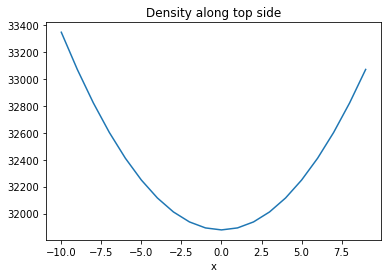

In [363]:
# Plot the charge density along one side of the box.

plt.plot(xx[cM+s-1][cM-s:cM+s], rho[cM-s:cM+s,cM+s-1])#, shading='auto')

plt.title("Density along top side")
plt.xlabel("x")
plt.show()

# # print(xx[cM-s:cM+s], rho[cM+s-1, cM-s:cM+s])
# plt.plot(yy[cM-s:cM+s], rho[cM-s, cM-s:cM+s])#, shading='auto')
# plt.title("Density along side")
# plt.xlabel("x")
# # plt.colorbar()
# plt.show()

#### part c: 
Now that you have the charge, show the potential everywhere in space. How close to constant is the potential in the interior of the box? Now plot the x− and y−components of the field just outside the box. Do they agree with what you expect? As a reminder, the boundary conditions are that the field is perpendicular to any equipotential, and that standard lore says that fields are stronger near points.

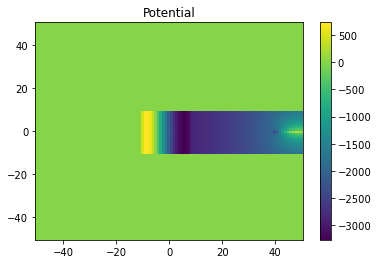

In [364]:
#I though this is how we get the resulting V, using G convolved with the found rho matrix, 
# but clearly something is wrong here as I expect a square near constant in the center, and then 
# decreasing away from the edges of the box

V_solved = convFunction(G, rho, p=100)

plt.pcolor(xx, yy, V_solved,  shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

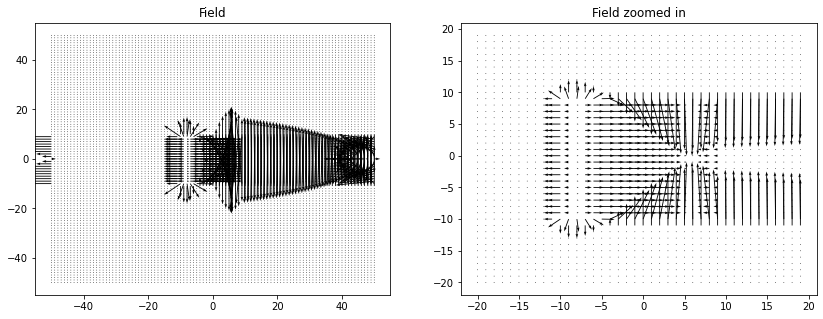

In [365]:
#if i actually had a correct potential this would hopefully express the shape of the field

u = np.roll(V_solved,1, axis = 1) - np.roll(V_solved,-1, axis = 1) 
v = np.roll(V_solved,1, axis = 0) - np.roll(V_solved,-1, axis = 0) 

fig, ax = plt.subplots(1, 2, figsize=(14,5))

ax[0].quiver(xx,yy,u,v)
ax[0].set_title("Field")

ax[1].quiver(xx[cM-s-10:cM+s+10,cM-s-10:cM+s+10],yy[cM-s-10:cM+s+10,cM-s-10:cM+s+10],\
           u[cM-s-10:cM+s+10,cM-s-10:cM+s+10],v[cM-s-10:cM+s+10,cM-s-10:cM+s+10])
ax[1].set_title("Field zoomed in")
plt.show()

In [366]:
"""
This was me messing around with the point potential in a) to try and build the potential from the known
charge density, but like superposition of the potential from each point will do weird stuff.
"""

def radius(x, y, x_p, y_p):
    return np.sqrt((x-x_p)**2 + (y-y_p)**2)

#basicly part a) but with the charge not in the center
def getV(rho_point, x, y, n, text=True):

    V = np.zeros([n,n])

    #get indice of [0, 0] since it's in the center of my array
    centI = int(n/2)

    #get the potential everywhere
    V = twoD_po(radius(xx,yy, x, y))
            
    #using the averaging technique for the r-r' = 0 spots
    for x_i in range(centI-s,centI+s):
        for y_i in range(centI-s,centI+s): #(cM-s,cM+s)
            if np.isinf(V[x_i, y_i]):
#                 print("inf!!", V[x_i, y_i])
                V[x_i, y_i] = 4*V[x_i+1, y_i] - (V[x_i+2, y_i] + V[x_i+1, y_i+1] + V[x_i+1, y_i-1])

    # set ρ to be the potential minus the average of neighbors.
    ave=(np.roll(V,1,axis=0)+np.roll(V,-1,axis=0)+np.roll(V,1,axis=1)+np.roll(V,-1,axis=1))/4
    rho_here = V - ave

    if text:
        print("Before scaling, V={}, rho={}".format(V[centI+x, centI+y], rho_here[centI+x, centI+y]))

    rescale_rho = rho_here[centI+x, centI+y] / rho_point #needs to be rho_point

    #rescale by a multiple so rho[0,0] = 1
    V = V/rescale_rho

    ave=(np.roll(V,1,axis=0)+np.roll(V,-1,axis=0)+np.roll(V,1,axis=1)+np.roll(V,-1,axis=1))/4
    # print(ave[centI, centI])
    rho_here = V - ave
    if text:
        print("Needed to multiply by {} to get density rho[x, y] = {}".format(rescale_rho, rho[centI+x, centI+y]))

        print(V[centI+x, centI+y])#, (V_r[centI+5, centI]))#
    offset = 1 - V[centI+x, centI+y]
    V = V + offset
    
    if text:
        print("Needed to offset {} to get V[x, y] = {}".format(offset, V[centI+x, centI+y]))

    return V


Rho here:  32821.36903621148
Before scaling, V=-0.05515890003816291, rho=0.008878599802684121
Needed to multiply by 2.70512780648743e-07 to get density rho[x, y] = 32821.36903621148
-203904.96857812407
Needed to offset 203905.96857812407 to get V[x, y] = 1.0
V here:  1.0


C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


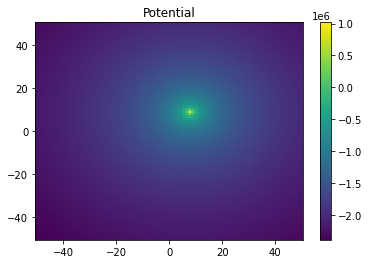

In [367]:
#trying it out for just one point - this does work
#position of point charge relative to center of grid
x = 8
y = 9

print("Rho here: ", rho[cM+x, cM+y])

Vpoint = getV(rho[cM+x, cM+y], x, y, m)

print("V here: ", Vpoint[cM+x, cM+y])#, Vpoint[50, 50])

plt.pcolor(xx, yy, Vpoint,  shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

-10 10 50


C:\Users\Emma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


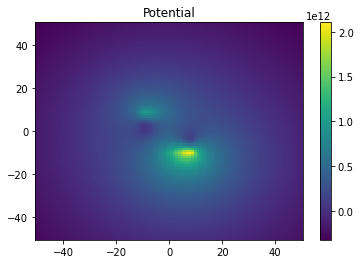

In [368]:
#try running it for the whole results just for fun
V_total = np.zeros([m,m])
print(-s,s, cM)

for x in range(-s,s):
    for y in range(-s,s): #(cM-s,cM+s)
        #i think the numbers are so big that when I try to offset it to 1 I get 0 instead?

        Vpoint = getV(rho[x+cM, y+cM], x, y, m, text=False)
        V_total += Vpoint
#         print("V here: ", Vpoint[x, y], x, y)

#         if Vpoint[x+cM, y+cM] != 0.0:
#             print(x, y, Vpoint[x+cM, y+cM], rho[x+cM, y+cM])
        
# print(V_total[39:45, 39:45])
plt.pcolor(xx, yy, V_total, shading='auto')
plt.title("Potential")
plt.colorbar()
plt.show()

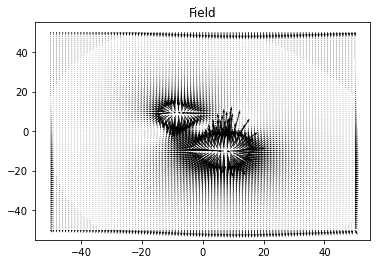

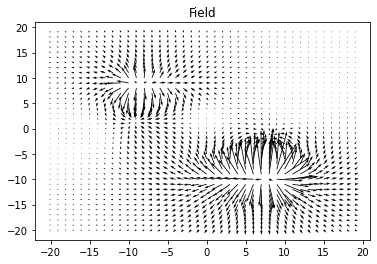

In [369]:
#and plotting it
#also definitly wrong, but it looks cool at least

u = np.roll(V_total,1, axis = 1) - np.roll(V_total,-1, axis = 1) 
v = np.roll(V_total,1, axis = 0) - np.roll(V_total,-1, axis = 0) 

plt.clf()
plt.quiver(xx,yy,u,v)
plt.title("Field")
plt.show()

plt.clf()
plt.quiver(xx[cM-s-10:cM+s+10,cM-s-10:cM+s+10],yy[cM-s-10:cM+s+10,cM-s-10:cM+s+10],\
           u[cM-s-10:cM+s+10,cM-s-10:cM+s+10],v[cM-s-10:cM+s+10,cM-s-10:cM+s+10])
plt.title("Field")
plt.show()